### Bayern Leverkusen throughout the season

In [1]:
from statsbombpy import sb
#importing necessary libraries
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from mplsoccer import Pitch
import os
import pathlib
import json
pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore')
from mplsoccer import VerticalPitch,Pitch
# events_df = sb.competition_events(
# country="Germany",
# division="1. Bundesliga",
# season="2023/2024",
# gender="male")

In [2]:
# events_df.to_csv("BayernLeverKusen.csv")

In [3]:
df = pd.read_csv("../event/Generated_data/BayernLeverKusen.csv")

In [4]:
len(df.match_id.unique())

34

In [5]:
len(df)

137765

In [6]:
import ast 

pass_df = df[(df['type']=='Pass') & (df['team']=='Bayer Leverkusen')]

# Function to safely parse the location fields
def parse_location(location):
    if isinstance(location, str):
        return ast.literal_eval(location)
    return location

# Apply the function to parse locations if they are strings
pass_df['location'] = pass_df['location'].apply(parse_location)
pass_df['pass_end_location'] = pass_df['pass_end_location'].apply(parse_location)
# Extract x and y coordinates for start and end locations
pass_df['x_start'] = pass_df['location'].apply(lambda x: x[0] if isinstance(x, list) else None)
pass_df['y_start'] = pass_df['location'].apply(lambda x: x[1] if isinstance(x, list) else None)
pass_df['x_end'] = pass_df['pass_end_location'].apply(lambda x: x[0] if isinstance(x, list) else None)
pass_df['y_end'] = pass_df['pass_end_location'].apply(lambda x: x[1] if isinstance(x, list) else None)

In [7]:
pass_df.head()

,Unnamed: 0,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,block_offensive,block_save_block,carry_end_location,...,tactics,team,team_id,timestamp,type,under_pressure,x_start,y_start,x_end,y_end
213,213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Bayer Leverkusen,904,00:00:19.820,Pass,NaN,33.3,43.2,8.5,33.8
214,214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Bayer Leverkusen,904,00:00:23.749,Pass,NaN,8.5,33.8,15.1,21.5
215,215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Bayer Leverkusen,904,00:00:27.644,Pass,NaN,22.3,19.5,38.1,19.5
216,216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Bayer Leverkusen,904,00:00:28.746,Pass,NaN,38.1,19.5,29.9,19.5
217,217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Bayer Leverkusen,904,00:00:37.056,Pass,NaN,48.1,28.6,48.6,49.7


In [8]:
# Apply the transformations to x_start and y_start
pass_df['x_start'] = pass_df['x_start'].apply(lambda x: x * 105 / 120 if x is not None else None)
pass_df['y_start'] = pass_df['y_start'].apply(lambda x: x * 68 / 80 if x is not None else None)

# Apply the transformations to x_end and y_end
pass_df['x_end'] = pass_df['x_end'].apply(lambda x: x * 105 / 120 if x is not None else None)
pass_df['y_end'] = pass_df['y_end'].apply(lambda x: x * 68 / 80 if x is not None else None)


In [9]:
def is_progressive(x, y, end_x, end_y):
    start_dist = np.sqrt((105 - x)**2 + (34 - y)**2)
    end_dist = np.sqrt((105 - end_x)**2 + (34 - end_y)**2)
    #mark that passes to own half are not progressive
    thres = 100
    if x < 52.5 and end_x < 52.5:
        thres = 30
    elif x < 52.5 and end_x >= 52.5:
        thres = 15
    elif x >= 52.5 and end_x >= 52.5:
        thres = 10
    if thres > start_dist - end_dist:
        return False
    else:
        return True

In [10]:
pass_df["is_progressive"] = pass_df.apply(lambda row : is_progressive(row['x_start'], row['y_start'], row['x_end'], row['y_end']), axis = 1)

In [11]:
pass_df["is_progressive"].value_counts()

is_progressive
False    20571
True      3673
Name: count, dtype: int64

In [12]:
pass_df["angle"] = np.arctan2(pass_df["y_end"] - pass_df["y_start"], pass_df["x_end"] - pass_df["x_start"])

In [13]:
pass_df

,Unnamed: 0,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,block_offensive,block_save_block,carry_end_location,...,team_id,timestamp,type,under_pressure,x_start,y_start,x_end,y_end,is_progressive,angle
213,213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,904,00:00:19.820,Pass,NaN,33.3,43.2,8.5,33.8,False,-2.779292
214,214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,904,00:00:23.749,Pass,NaN,8.5,33.8,15.1,21.5,False,-1.078311
215,215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,904,00:00:27.644,Pass,NaN,22.3,19.5,38.1,19.5,False,0.000000
216,216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,904,00:00:28.746,Pass,NaN,38.1,19.5,29.9,19.5,False,3.141593
217,217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,904,00:00:37.056,Pass,NaN,48.1,28.6,48.6,49.7,False,1.547104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39403,39403,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,904,00:48:45.365,Pass,NaN,105.1,74.0,112.3,77.0,False,0.394791
39404,39404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,904,00:48:50.108,Pass,True,117.9,79.5,117.5,76.1,False,-1.687905
39405,39405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,904,00:49:33.922,Pass,NaN,120.0,80.0,116.4,77.0,False,-2.446854
39413,39413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,904,00:50:26.395,Pass,NaN,92.0,12.8,96.5,22.4,True,1.132460


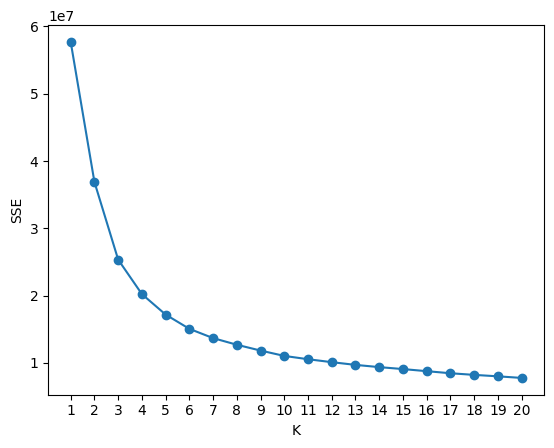

Text(0.5, 0, 'k')

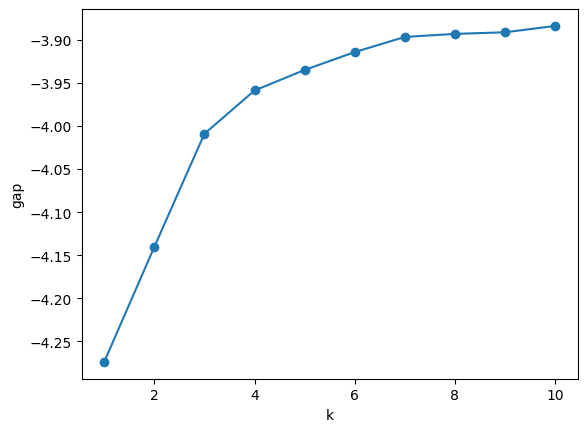

In [14]:
from sklearn.cluster import KMeans

K = np.linspace(1, 20, 20)
X = pass_df[["x_start", "y_start", "x_end", "y_end", "angle"]].values
elbow = {"sse": [], "k": [], "sil": []}
for k in K:
    cluster = KMeans(n_clusters = int(k), random_state = 2147)
    labels = cluster.fit_predict(X)
    elbow["sse"].append(cluster.inertia_)
    elbow["k"].append(k)

plt.scatter(elbow["k"], elbow["sse"])
plt.plot(elbow["k"], elbow["sse"])
plt.xticks(np.linspace(1, 20, 20))
plt.xlabel("K")
plt.ylabel("SSE")
plt.show()
from sklearn.metrics import pairwise_distances
def compute_inertia(a, X):
    W = [np.mean(pairwise_distances(X[a == c, :])) for c in np.unique(a)]
    return np.mean(W)

def compute_gap(clustering, data, k_max, n_references=5):
    if len(data.shape) == 1:
        data = data.reshape(-1, 1)
    reference = np.random.rand(*data.shape)
    reference_inertia = []
    for k in range(1, k_max+1):
        local_inertia = []
        for _ in range(n_references):
            clustering.n_clusters = k
            assignments = clustering.fit_predict(reference)
            local_inertia.append(compute_inertia(assignments, reference))
        reference_inertia.append(np.mean(local_inertia))

    ondata_inertia = []
    for k in range(1, k_max+1):
        clustering.n_clusters = k
        assignments = clustering.fit_predict(data)
        ondata_inertia.append(compute_inertia(assignments, data))

    gap = np.log(reference_inertia)-np.log(ondata_inertia)
    return gap, np.log(reference_inertia), np.log(ondata_inertia)

k_max = 10
gap, reference_inertia, ondata_inertia = compute_gap(KMeans(random_state = 2147), X, k_max)

plt.plot(range(1, k_max+1), gap, '-o')
plt.ylabel('gap')
plt.xlabel('k')

In [15]:
k = 20
cluster = KMeans(n_clusters = int(k), random_state = 2147)
labels = cluster.fit_predict(X)

pass_df["label"] = labels

In [16]:
LINEWIDTH = 1  # starting linewidth
DIFF_LINEWIDTH = 1.2  # amount the glow linewidth increases each loop
NUM_GLOW_LINES = 10  # the amount of loops, if you increase the glow will be wider

# in each loop, for the glow, we plot the alpha divided by the num_glow_lines
# I have a lower alpha_pass_line value as there is a slight overlap in
# the pass comet lines when using capstyle='round'
ALPHA_PITCH_LINE = 0.3
ALPHA_PASS_LINE = 0.15

# The colors are borrowed from mplcyberpunk. Try some of the following alternatives
# '#08F7FE' (teal/cyan), '#FE53BB' (pink), '#F5D300' (yellow),
# '#00ff41' (matrix green), 'r' (red), '#9467bd' (viloet)
BACKGROUND_COLOR = '#212946'
PASS_COLOR = '#FE53BB'
LINE_COLOR = '#08F7FE'

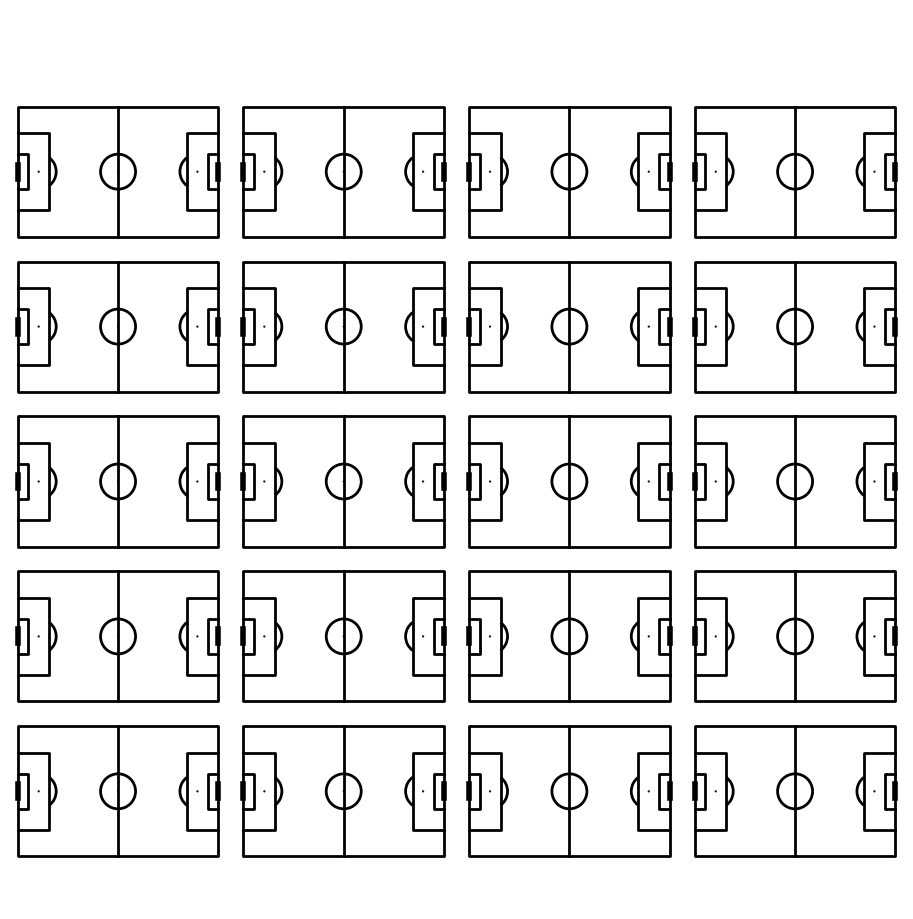

In [23]:
# Plot each cluster separately
unique_labels = pass_df['label'].unique()
p = Pitch(line_color='black', pitch_type = "custom", pitch_length=105, pitch_width=68)
fig, axs = pitch.grid(ncols = 4, nrows = 5, grid_height=0.85, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0.04, endnote_space=0.01)
ax.set_title(f"Passes for Cluster {label}", fontsize=16)
for label in unique_labels:
    cluster_df = pass_df[pass_df['label'] == label].head(20)
    for index, row in cluster_df.iterrows():
        if row['x_start'] is not None and row['y_start'] is not None and row['x_end'] is not None and row['y_end'] is not None:
            p.scatter(x=row['x_start'], y=row['y_start'], color='white', ax=ax)
            p.scatter(x=row['x_end'], y=row['y_end'], color='red', ax=ax, marker='+')
            p.lines(xstart=row['x_start'], xend=row['x_end'], ystart=row['y_start'], yend=row['y_end'], ax=ax, linewidth=0.5)
    plt.show()